In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report
from xgboost import XGBClassifier
from scipy import stats

import warnings 
warnings.filterwarnings("ignore")

In [28]:
dataframe = pd.read_csv('train.csv')
dataframe.columns = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
dataframe['Location'] = dataframe['Location'].astype('object')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17109 entries, 0 to 17108
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          17109 non-null  object 
 1   Location      17109 non-null  object 
 2   MinTemp       17037 non-null  float64
 3   MaxTemp       17067 non-null  float64
 4   Rainfall      16944 non-null  float64
 5   Evaporation   9871 non-null   float64
 6   Sunshine      9051 non-null   float64
 7   WindDir9am    15926 non-null  object 
 8   WindDir3pm    16702 non-null  object 
 9   WindSpeed9am  16962 non-null  float64
 10  WindSpeed3pm  16815 non-null  float64
 11  Humidity9am   16923 non-null  float64
 12  Humidity3pm   16710 non-null  float64
 13  Pressure9am   15448 non-null  float64
 14  Pressure3pm   15453 non-null  float64
 15  Cloud9am      10681 non-null  float64
 16  Cloud3pm      10238 non-null  float64
 17  Temp9am       17015 non-null  float64
 18  Temp3pm       16803 non-nu

In [29]:
# 若我是使用 決策樹 或 隨機森林，我會先將日期刪除，因為日期不會影響到結果
dataframe.drop("Date", axis=1, inplace=True)

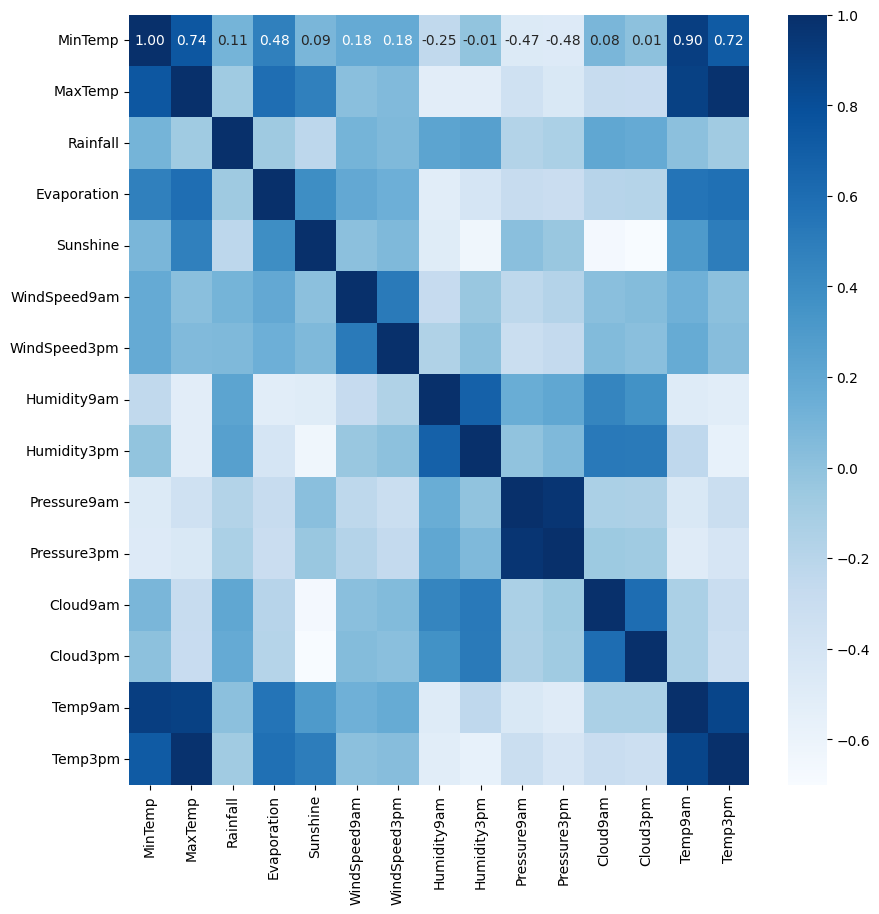

In [30]:
# 查看 dataframe 的 correlation matrix
corr = dataframe.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.show()

In [31]:
# 取得 類別型 以及 數值型 的欄位
def get_num_cat_col(df):
    cat_cols = dataframe.select_dtypes(include=['object']).columns
    num_cols = dataframe.select_dtypes(exclude=['object']).columns
    return cat_cols, num_cols

In [32]:
categorical_cols, numerical_cols = get_num_cat_col(dataframe)

In [33]:
# num -> median , cat -> most_frequent
for col in numerical_cols:
    dataframe[col]= dataframe[col].fillna(dataframe[col].median())
for col in categorical_cols:
    dataframe[col] = dataframe[col].fillna(dataframe[col].mode()[0])

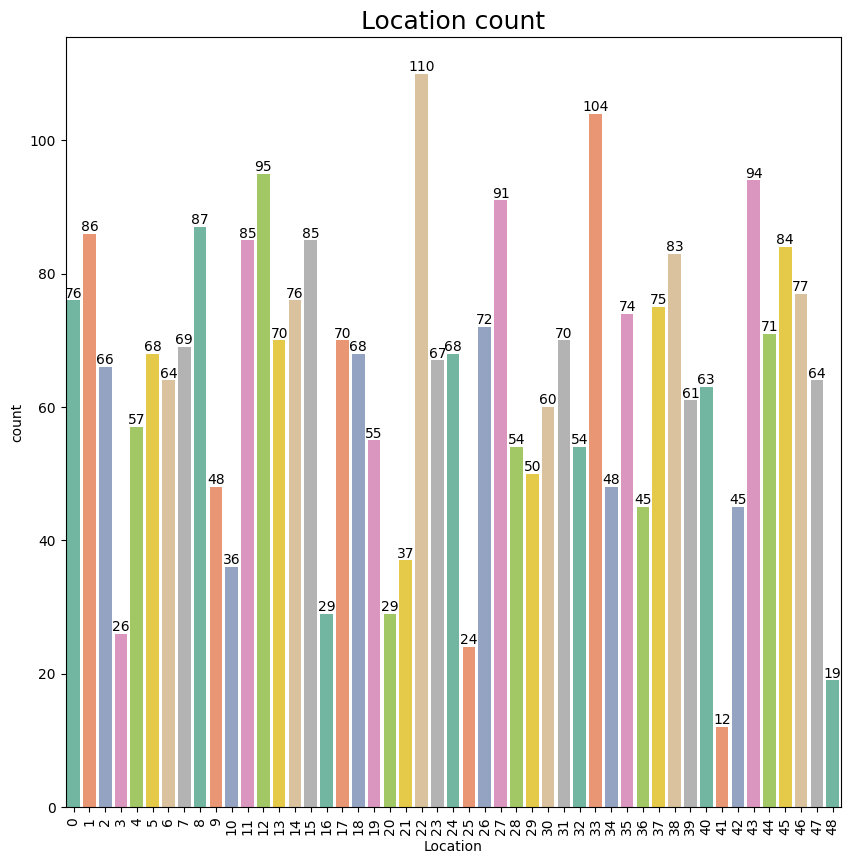

In [34]:
# 查看在 Location 下，隔天會下雨的分布
plt.figure(figsize=(10,10))
ax = sns.countplot(x ='Location',data=dataframe[dataframe['RainTomorrow'] == 'Yes'], palette='Set2')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])###Add a label to the height of the chart bars 
plt.title('Location count', fontsize=18)

plt.show()

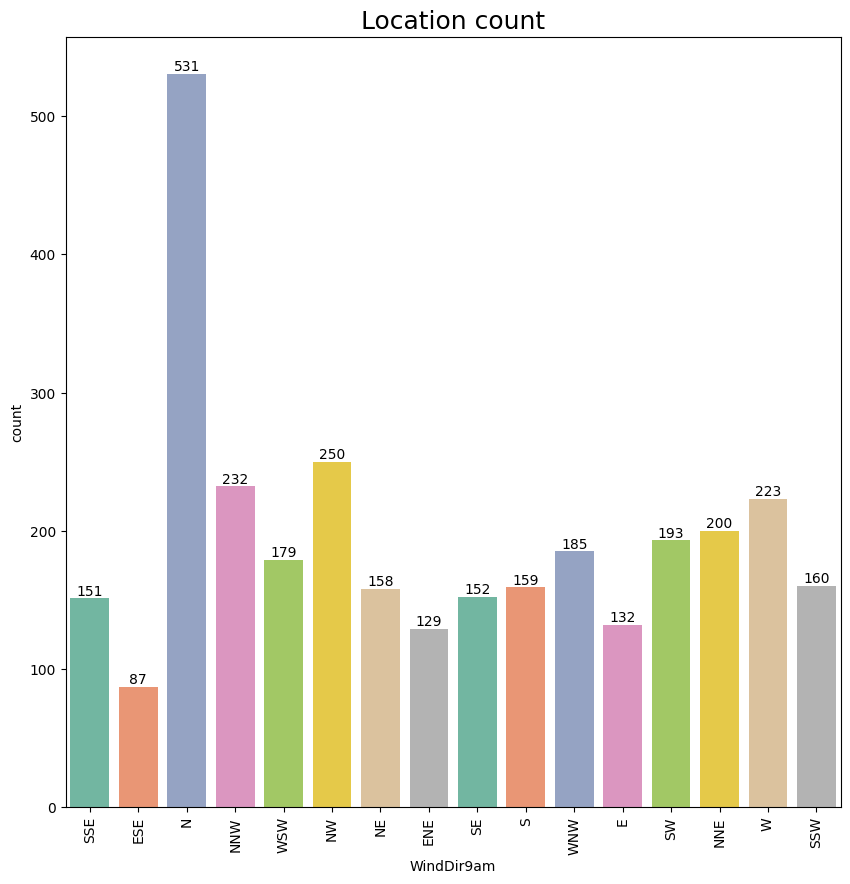

In [35]:
# 查看在 WindDir9am 下，隔天會下雨的分布
plt.figure(figsize=(10,10))
ax = sns.countplot(x ='WindDir9am',data=dataframe[dataframe['RainTomorrow'] == 'Yes'], palette='Set2')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])###Add a label to the height of the chart bars 
plt.title('Location count', fontsize=18)

plt.show()

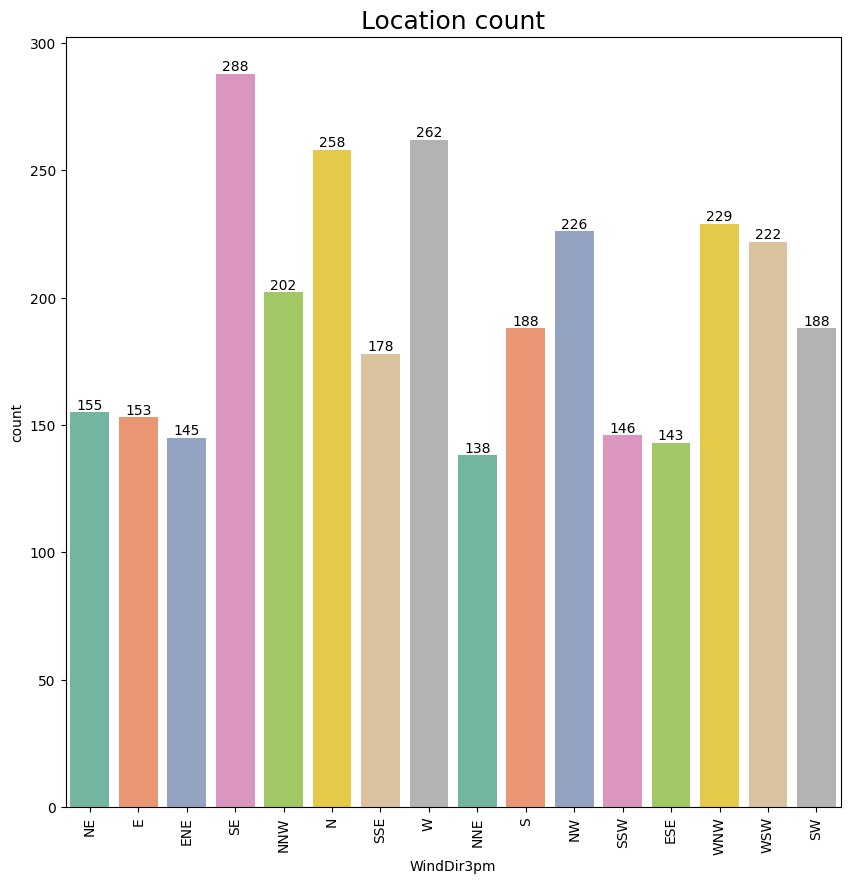

In [36]:
# 查看在 WindDir3pm 下，隔天會下雨的分布
plt.figure(figsize=(10,10))
ax = sns.countplot(x ='WindDir3pm',data=dataframe[dataframe['RainTomorrow'] == 'Yes'], palette='Set2')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])###Add a label to the height of the chart bars 
plt.title('Location count', fontsize=18)

plt.show()

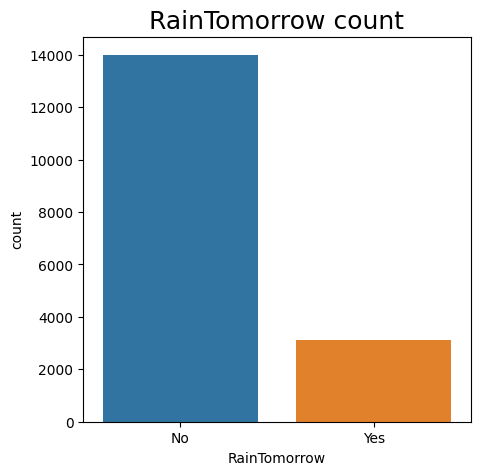

In [37]:
plt.figure(figsize=(5,5))
sns.countplot(x=dataframe['RainTomorrow'])
plt.title('RainTomorrow count', fontsize=18)
plt.show()

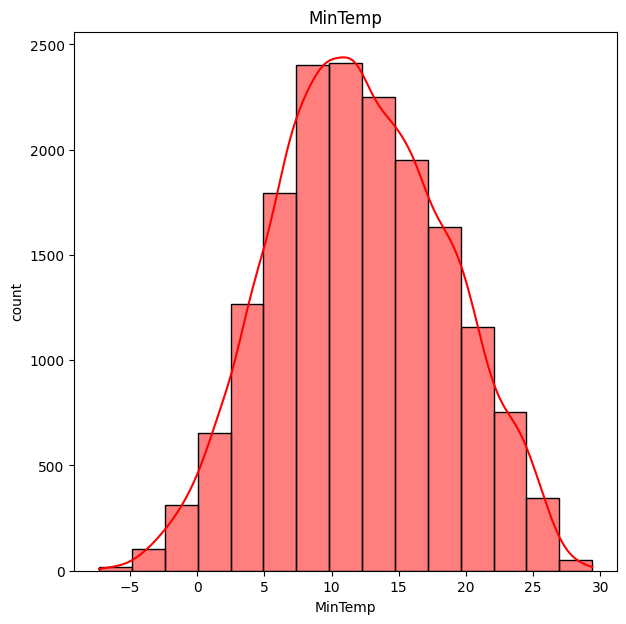

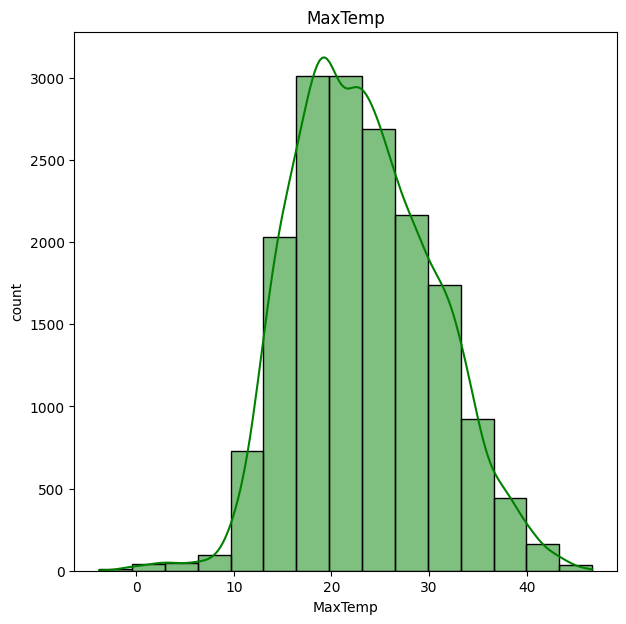

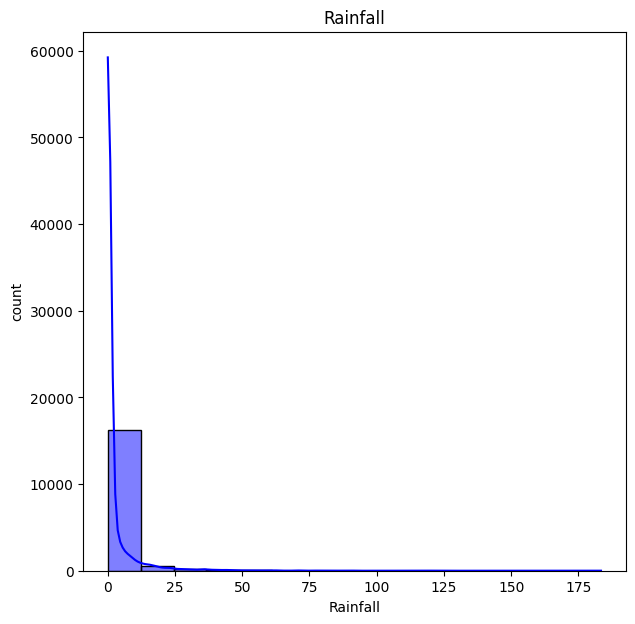

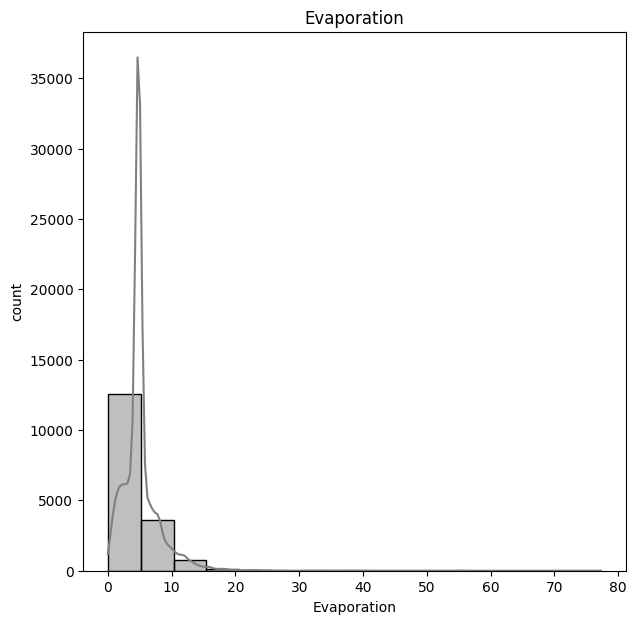

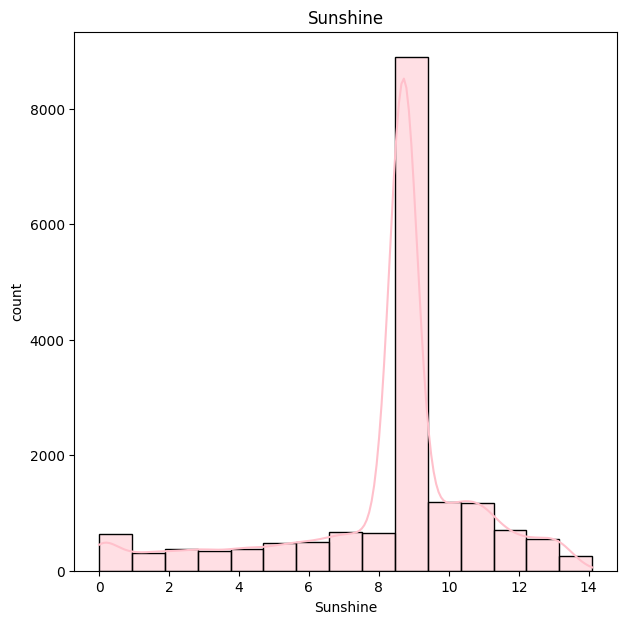

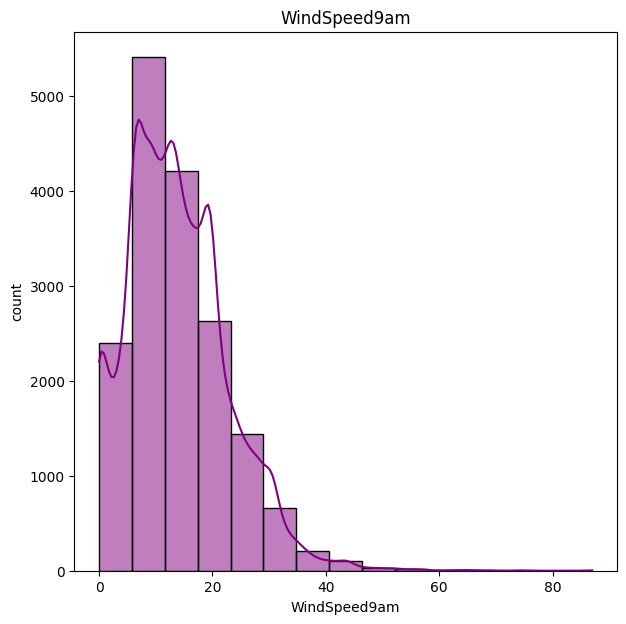

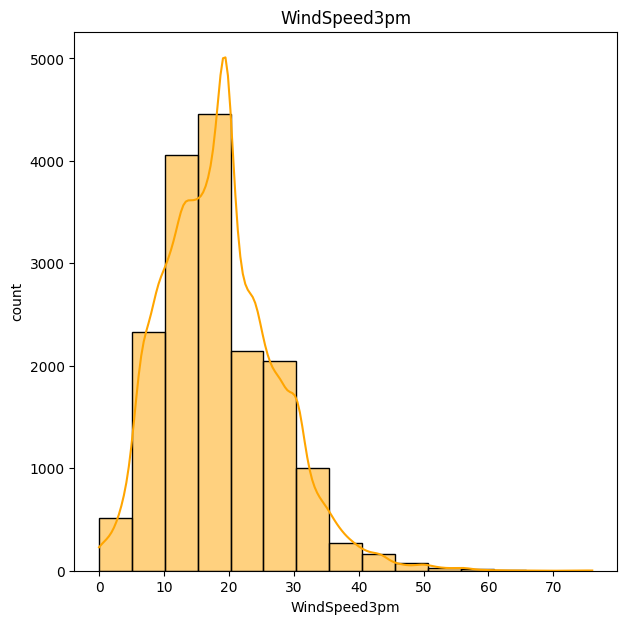

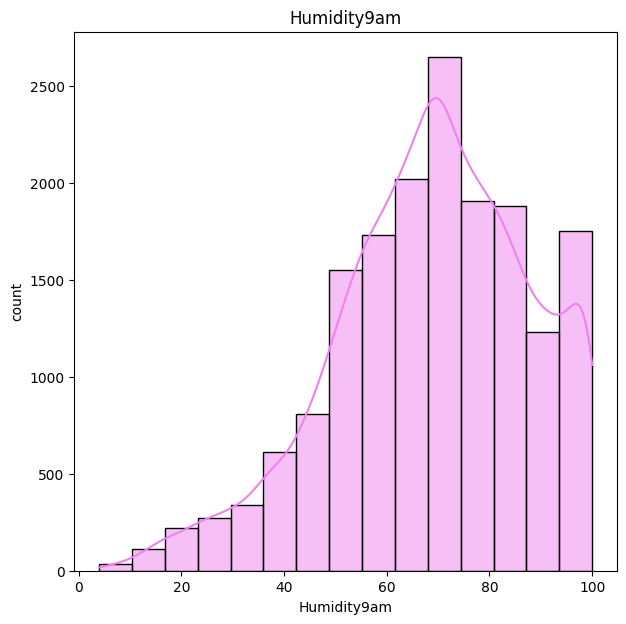

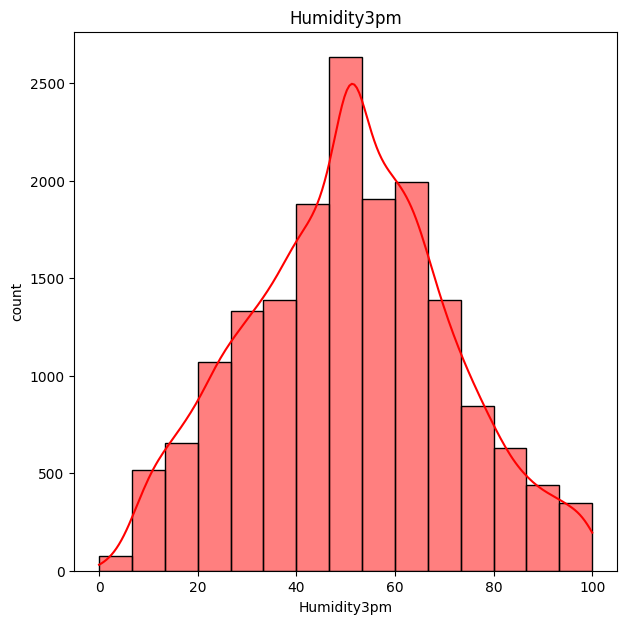

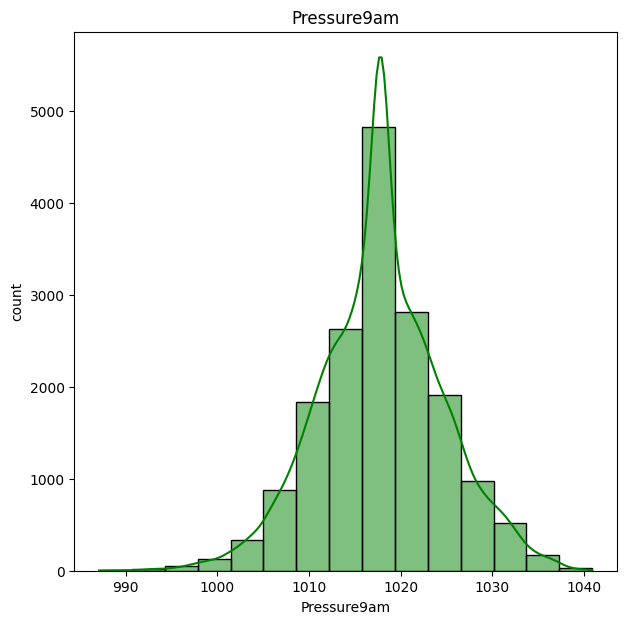

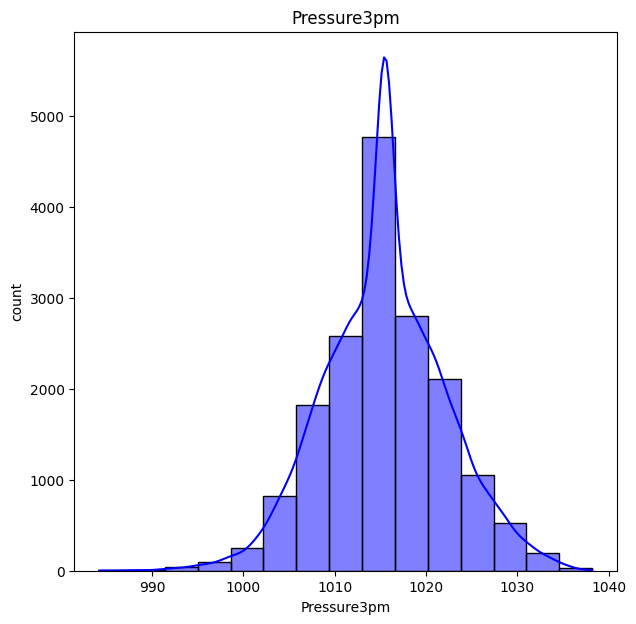

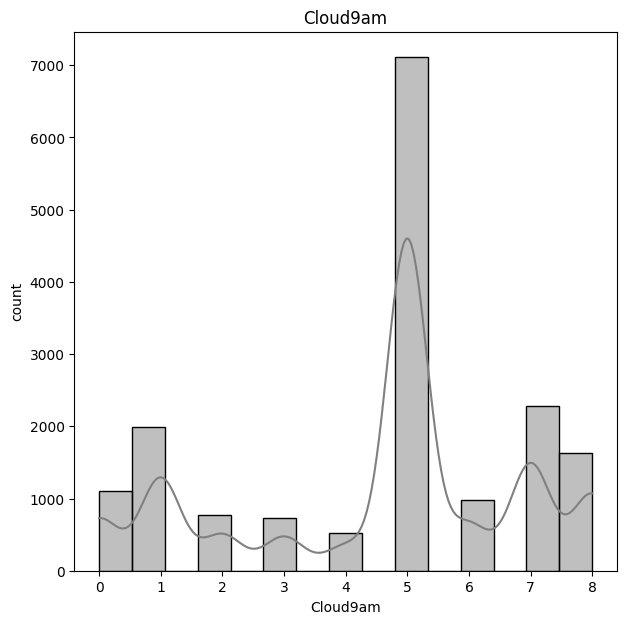

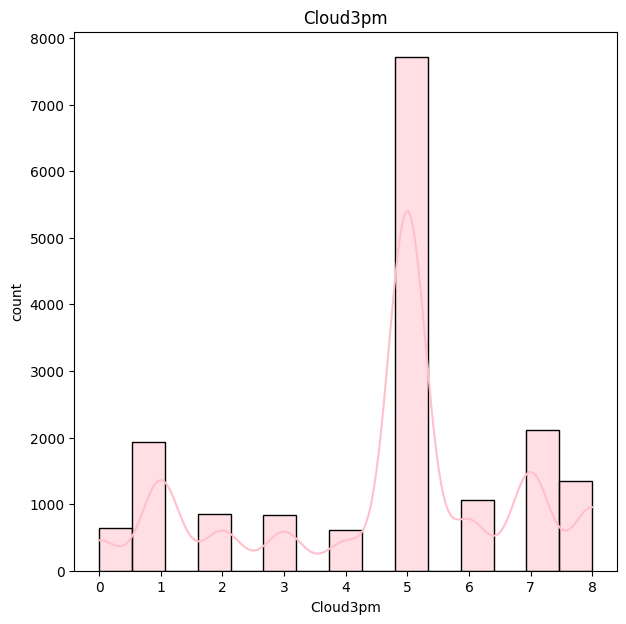

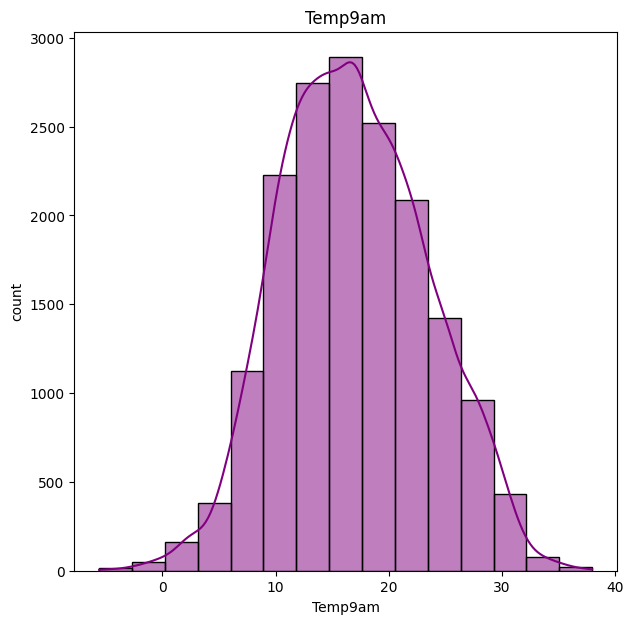

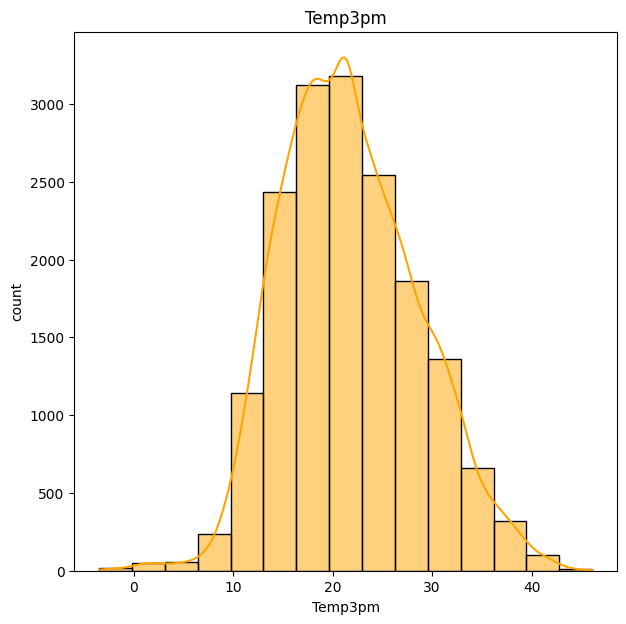

In [38]:
colors_list=["red","green","blue","grey","pink", "purple","orange","violet","red","green","blue","grey","pink", "purple","orange","violet"]
for i in range(len(numerical_cols)):
    plt.figure(figsize=(7,7))
    sns.histplot(dataframe[numerical_cols[i]], color=colors_list[i], kde=True, bins=15)
    label=numerical_cols[i]
    plt.xlabel(numerical_cols[i])
    plt.ylabel("count")
    plt.title(label)

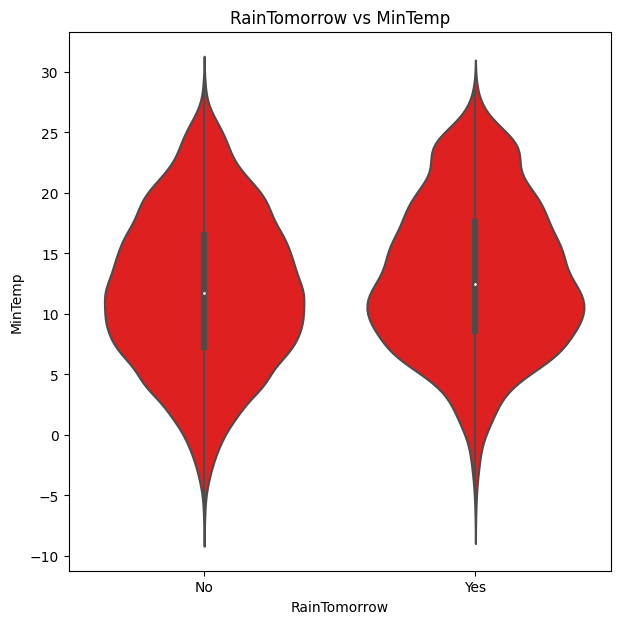

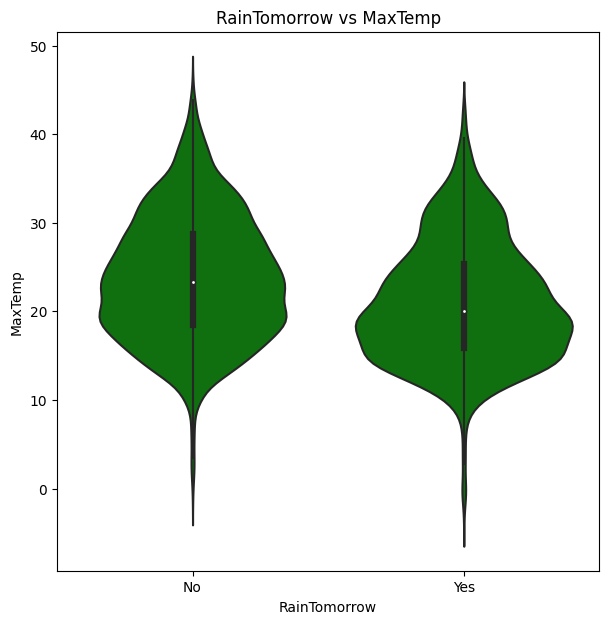

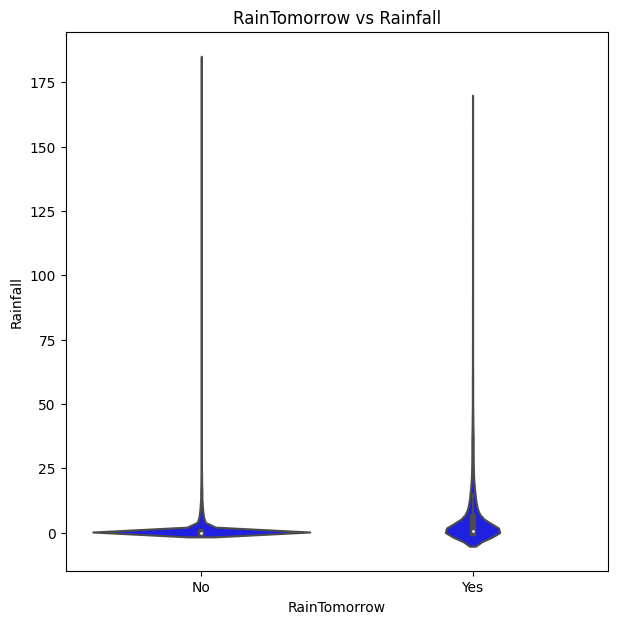

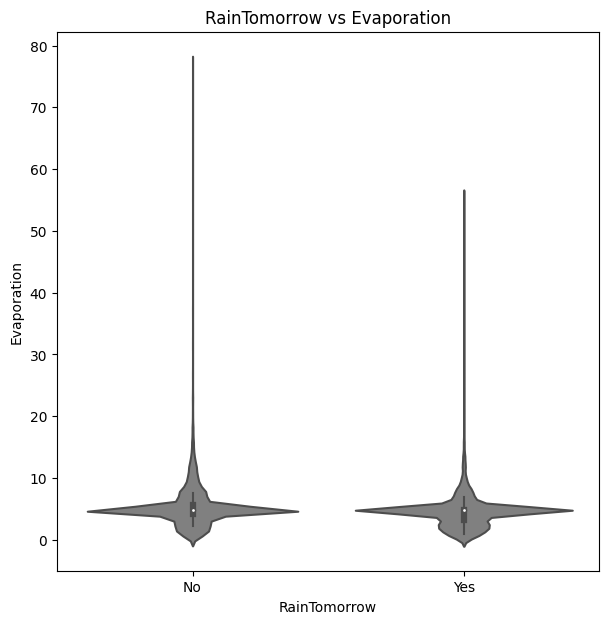

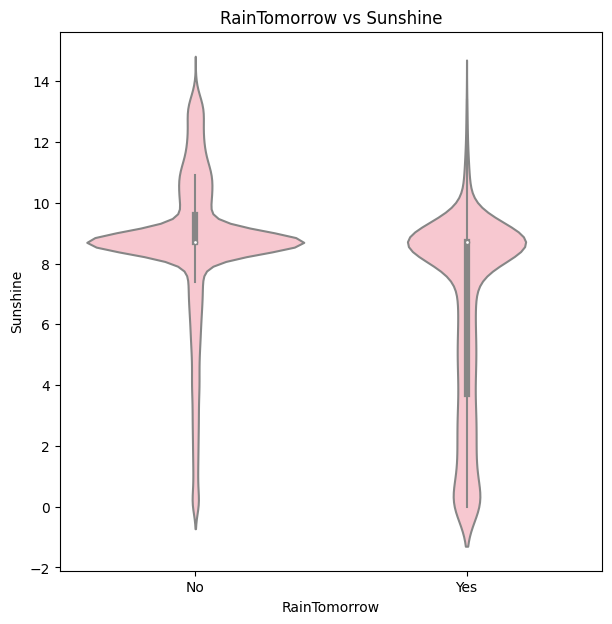

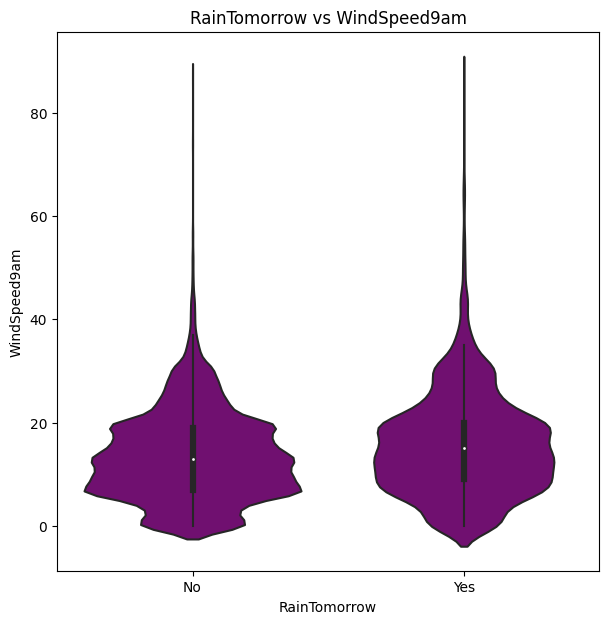

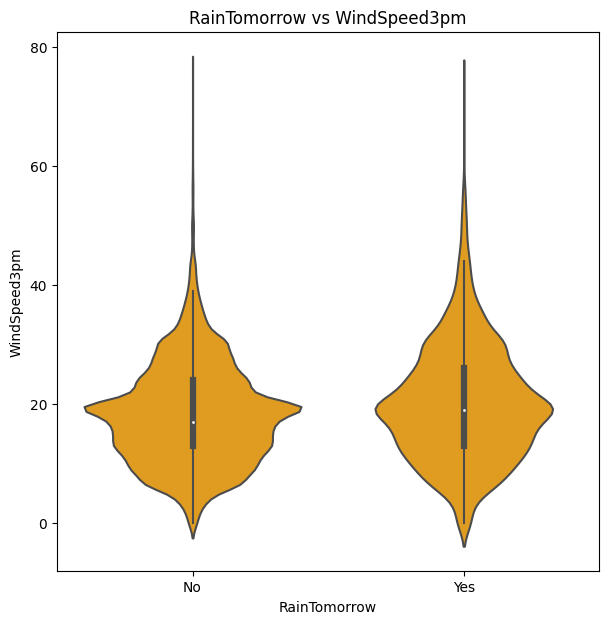

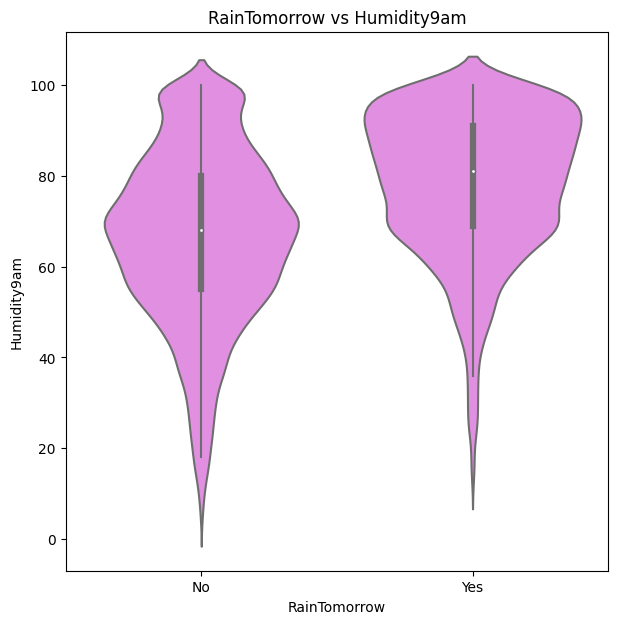

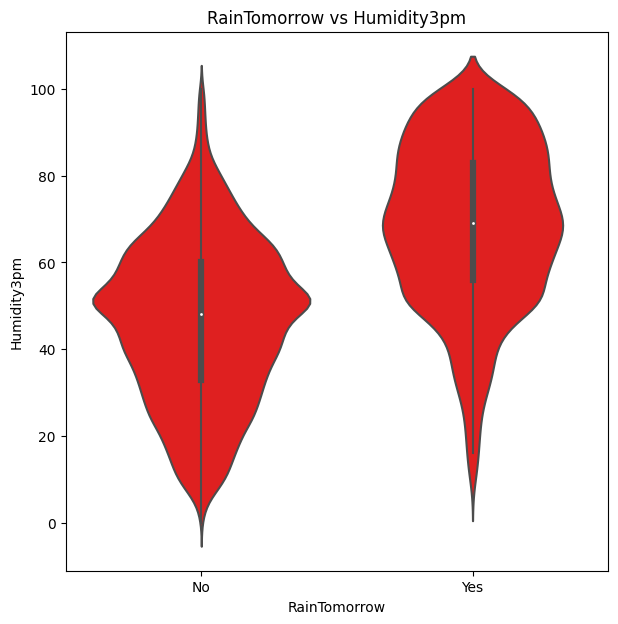

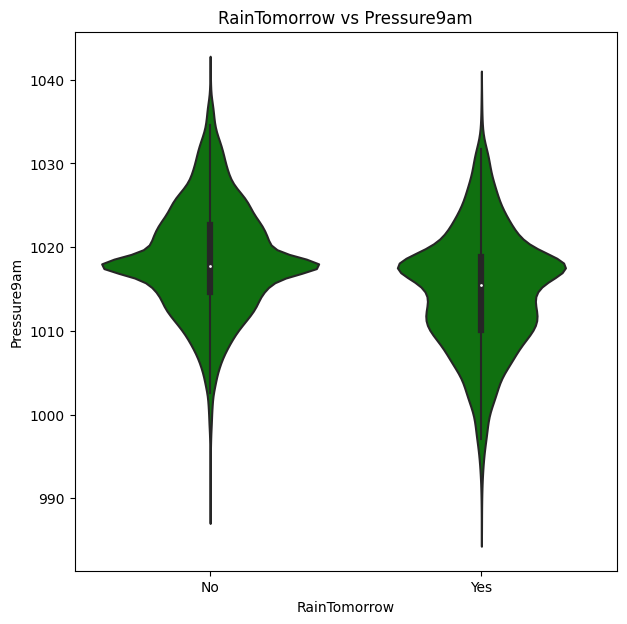

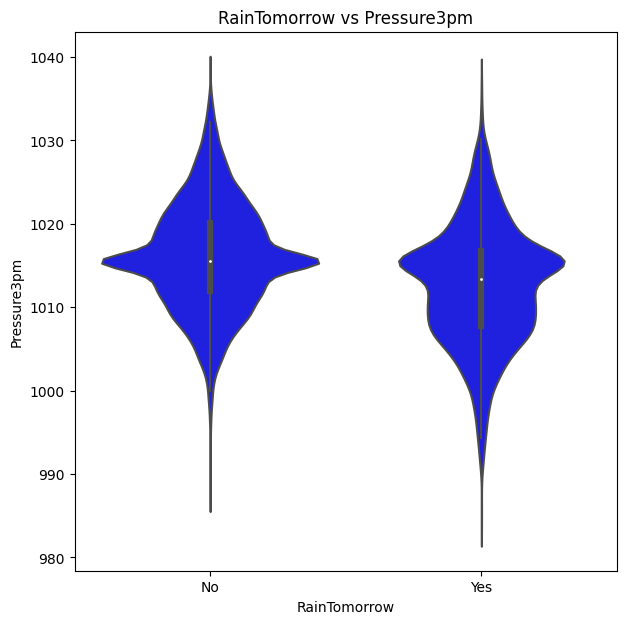

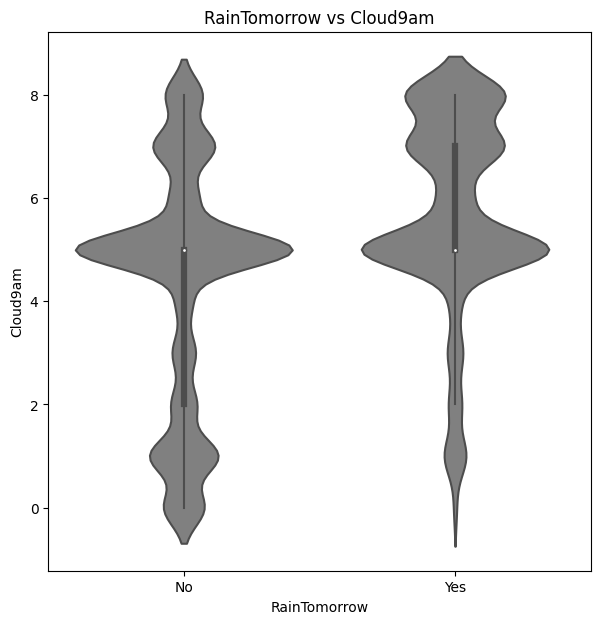

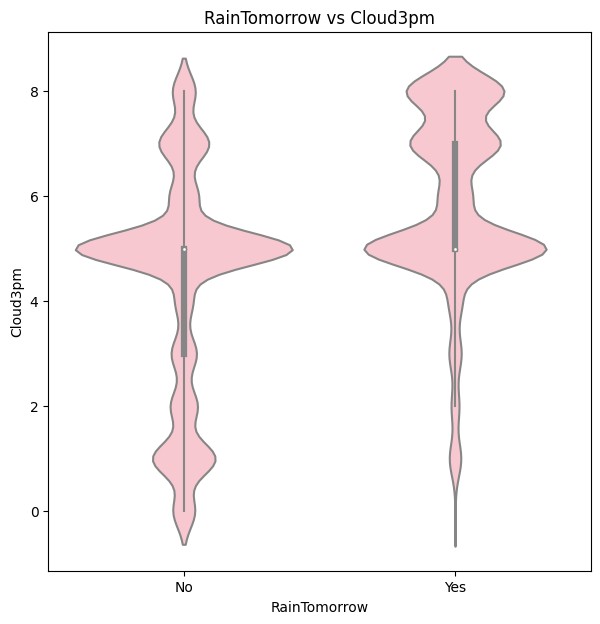

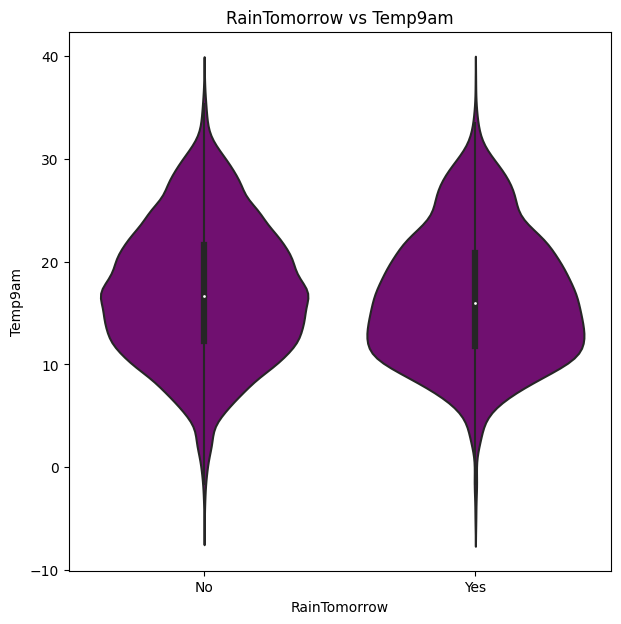

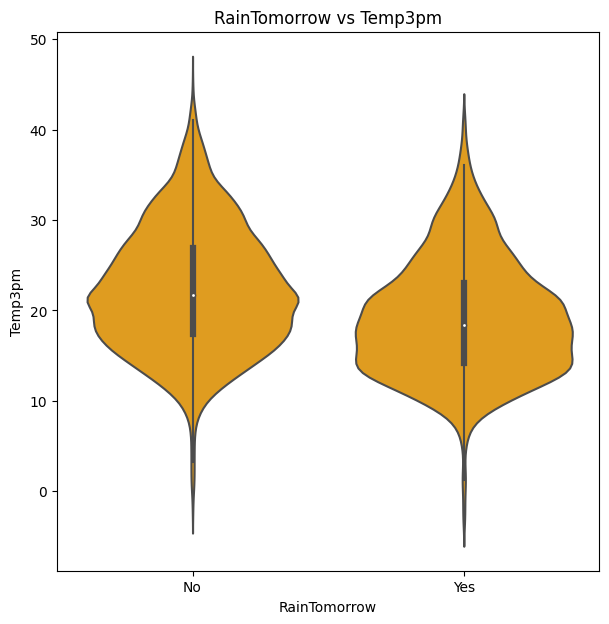

In [39]:
for i in range(len(numerical_cols)):
    plt.figure(figsize=(7,7))
    sns.violinplot(data=dataframe, x=dataframe['RainTomorrow'], y=dataframe[numerical_cols[i]], hue=None ,color=colors_list[i])
    plt.title(f"RainTomorrow vs {numerical_cols[i]}")